In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('regression.csv')

In [99]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [100]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [102]:
df.columns

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount'],
      dtype='object')

In [103]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001])

In [104]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [105]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [106]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [107]:
# for visualization we use matplotlib and seeborn
from matplotlib import pyplot as plt
import seaborn as snb

Text(0.5, 1.0, 'Account Type ViolinPlot')

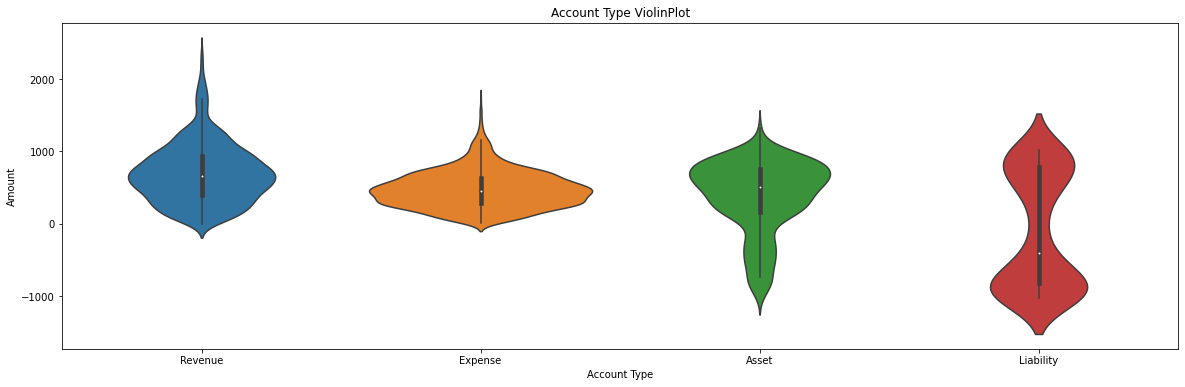

In [108]:
plt.figure(figsize=(20, 6))
snb.violinplot(x='Account Type', y='Amount', data=df).set_title("Account Type ViolinPlot")

Text(0.5, 1.0, 'Account Type ViolinPlot')

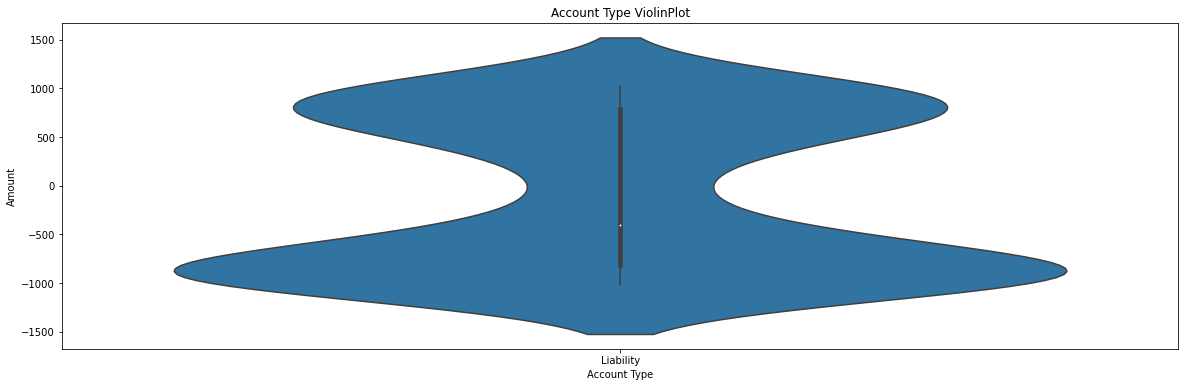

In [109]:
# for account type = liability
plt.figure(figsize=(20, 6))
snb.violinplot(x='Account Type', y='Amount', data=df[df['Account Type']=='Liability']).set_title("Account Type ViolinPlot")

Text(0.5, 1.0, 'Account Type ViolinPlot')

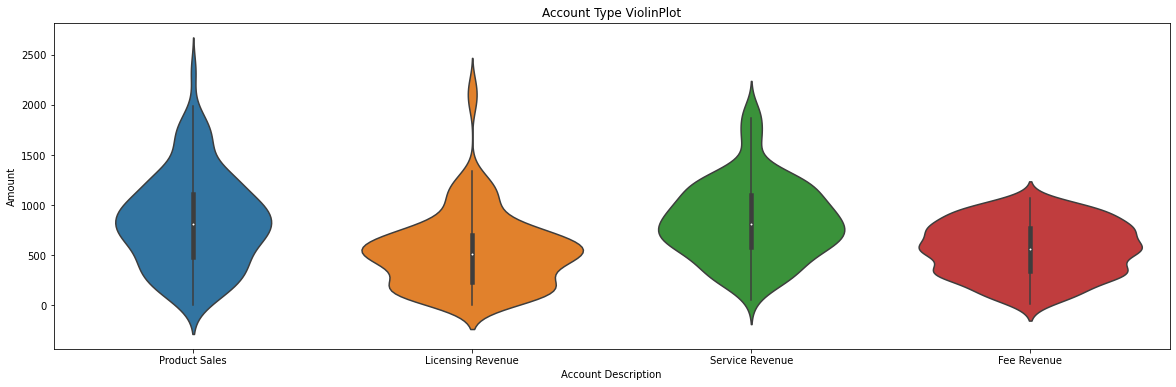

In [110]:
# for account type = liability
plt.figure(figsize=(20, 6))
snb.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title("Account Type ViolinPlot")

In [111]:
# 1. Review trends

In [112]:
monthMap = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12,
}

In [113]:
monthMap['Jan']

1

In [114]:
df['Period'] = df['Month'].apply(lambda x: monthMap[x])

In [115]:
df[df['Month']=='Dec'].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
1287,2019,Dec,CC100,1000000,Product Sales,Revenue,1255.978,12
1288,2019,Dec,CC100,1000001,Licensing Revenue,Revenue,712.648,12
1289,2019,Dec,CC100,1000002,Service Revenue,Revenue,974.388,12
1290,2019,Dec,CC100,1000004,Fee Revenue,Revenue,431.811,12
1291,2019,Dec,CC100,2000000,Cost of Good Sold,Expense,832.194,12


In [116]:
df['Day'] = 1

In [117]:
df['Date'] = df['Year'].astype(str) + "-" + df['Period'].astype(str) + "-" + df['Day'].astype(str)

In [118]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1


In [119]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [120]:
df['Date'] = pd.to_datetime(df['Date'])

In [121]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

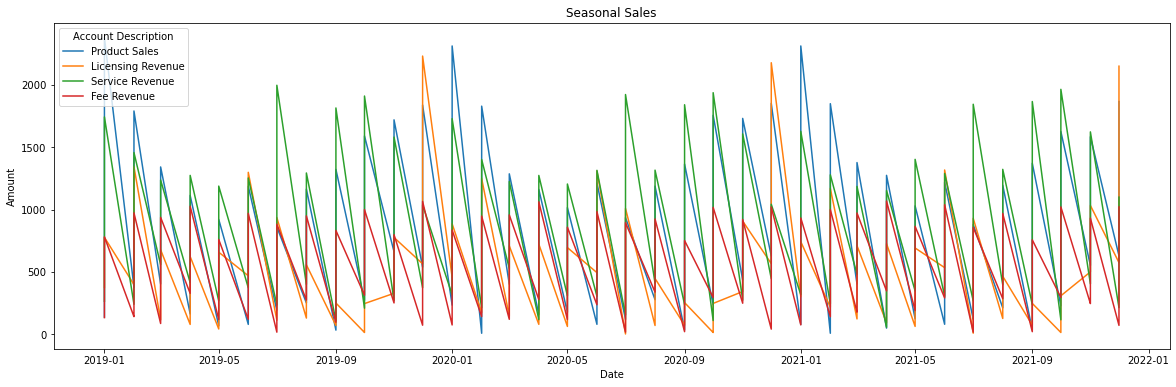

In [122]:
plt.figure(figsize=(20, 6))
snb.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

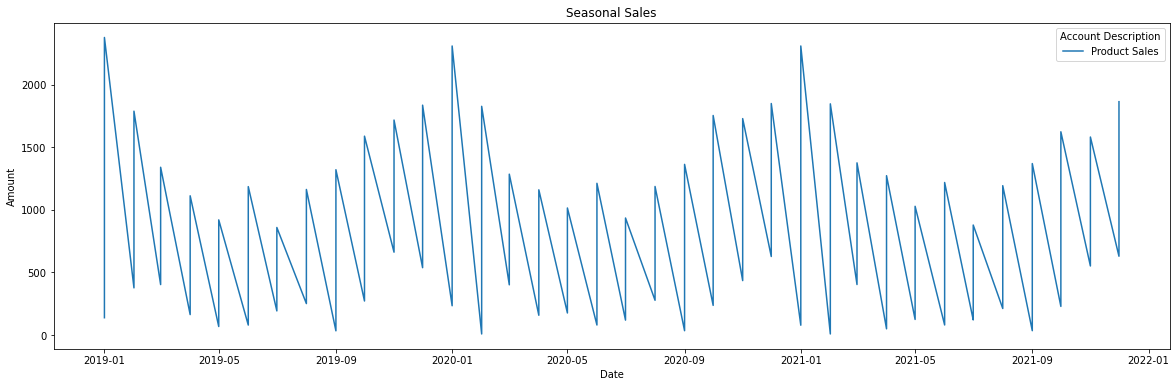

In [123]:
plt.figure(figsize=(20, 6))
snb.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Seasonal Sales')
plt.show()

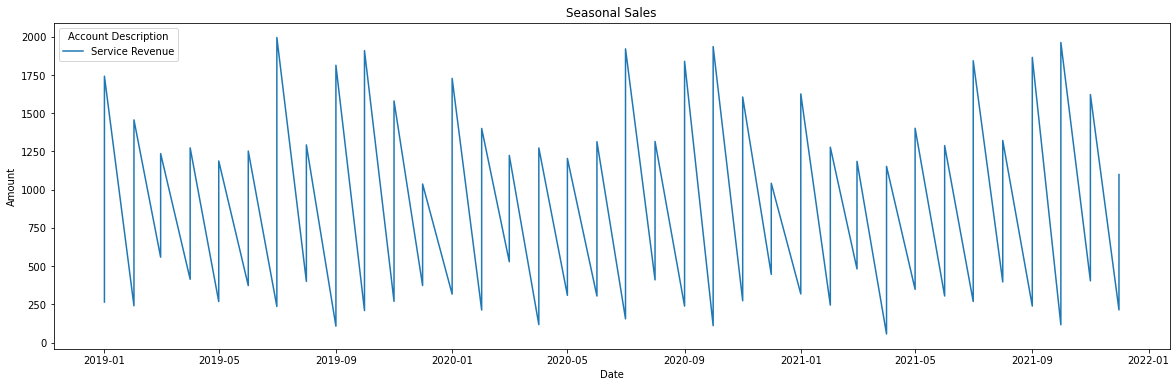

In [124]:
plt.figure(figsize=(20, 6))
snb.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

In [125]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [126]:
## Create the number of columns per each individual accounts
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [127]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
  corrdict[key] = {int(row['Account']): row['Amount']}

In [128]:
corrdict

{0: {1000000: 1344.051},
 1: {1000001: 480.968},
 2: {1000002: 650.82},
 3: {1000004: 339.36},
 4: {2000000: 1125.328},
 5: {2000001: 412.088},
 6: {2000002: 259.488},
 7: {2000003: 376.697},
 8: {2000005: 1105.277},
 9: {3000000: 476.713},
 10: {3000001: 980.0},
 11: {3000002: 385.275},
 12: {4000001: 980.0},
 13: {1000000: 1296.06},
 14: {1000001: 459.764},
 15: {1000002: 512.169},
 16: {1000004: 732.538},
 17: {2000000: 1404.449},
 18: {2000001: 584.214},
 19: {2000002: 306.435},
 20: {2000003: 318.227},
 21: {2000005: 1531.884},
 22: {3000000: 464.197},
 23: {3000001: 980.0},
 24: {3000002: 491.607},
 25: {4000001: 200.0},
 26: {1000000: 244.447},
 27: {1000001: 776.767},
 28: {1000002: 872.102},
 29: {1000004: 690.433},
 30: {2000000: 53.563},
 31: {2000001: 529.574},
 32: {2000002: 450.893},
 33: {2000003: 454.857},
 34: {2000005: 43.042},
 35: {3000000: -296.261},
 36: {3000001: 980.0},
 37: {3000002: 158.931},
 38: {4000001: -980.0},
 39: {1000000: 994.789},
 40: {1000001: 588.

In [129]:
# Create a data frame from a dictionary
corrdf = pd.DataFrame.from_dict(corrdict)

In [130]:
corrdf

,0,1,2,3,4,5,6,7,8,9,...,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211
1000000,1344.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000001,NaN,480.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,NaN,NaN,650.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,339.36,NaN,NaN,NaN,NaN,NaN,NaN,...,1020.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,1125.328,NaN,NaN,NaN,NaN,NaN,...,NaN,680.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000001,NaN,NaN,NaN,NaN,NaN,412.088,NaN,NaN,NaN,NaN,...,NaN,NaN,701.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000002,NaN,NaN,NaN,NaN,NaN,NaN,259.488,NaN,NaN,NaN,...,NaN,NaN,NaN,427.631,NaN,NaN,NaN,NaN,NaN,NaN
2000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.697,NaN,NaN,...,NaN,NaN,NaN,NaN,540.06,NaN,NaN,NaN,NaN,NaN
2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105.277,NaN,...,NaN,NaN,NaN,NaN,NaN,698.121,NaN,NaN,NaN,NaN
3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.713,...,NaN,NaN,NaN,NaN,NaN,NaN,-282.056,NaN,NaN,NaN


In [131]:
# Transpose the data frame and fill missing values to a zero

corrdfT = corrdf.T.fillna(0)

In [132]:
corrdfT

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [133]:
# Calculate correlation

corrdfT.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


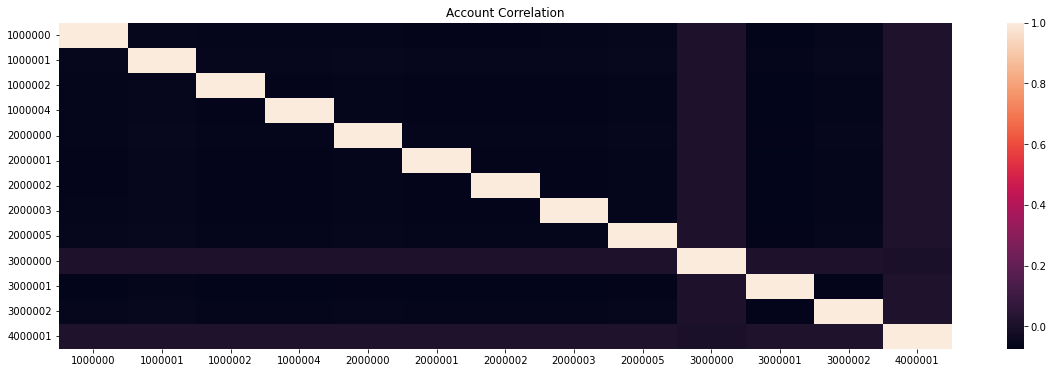

In [134]:
plt.figure(figsize=(20,6))
snb.heatmap(corrdfT.corr()).set_title("Account Correlation")
plt.show()

In [135]:
df[df['Account']==3000002]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
11,2019,Jan,CC100,3000002,Accounts Receivable,Asset,385.275,1,1,2019-01-01
24,2019,Jan,CC101,3000002,Accounts Receivable,Asset,491.607,1,1,2019-01-01
37,2019,Jan,CC102,3000002,Accounts Receivable,Asset,158.931,1,1,2019-01-01
50,2019,Jan,CC200,3000002,Accounts Receivable,Asset,218.042,1,1,2019-01-01
63,2019,Jan,CC201,3000002,Accounts Receivable,Asset,881.297,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4158,2021,Dec,CC201,3000002,Accounts Receivable,Asset,474.790,12,1,2021-12-01
4171,2021,Dec,CC202,3000002,Accounts Receivable,Asset,346.971,12,1,2021-12-01
4184,2021,Dec,CC300,3000002,Accounts Receivable,Asset,647.375,12,1,2021-12-01
4197,2021,Dec,CC301,3000002,Accounts Receivable,Asset,298.671,12,1,2021-12-01


In [136]:
import numpy as np 

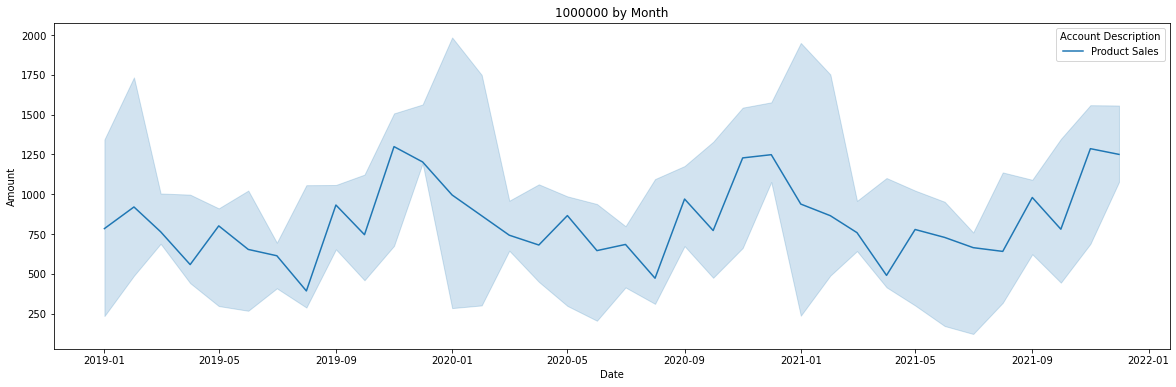

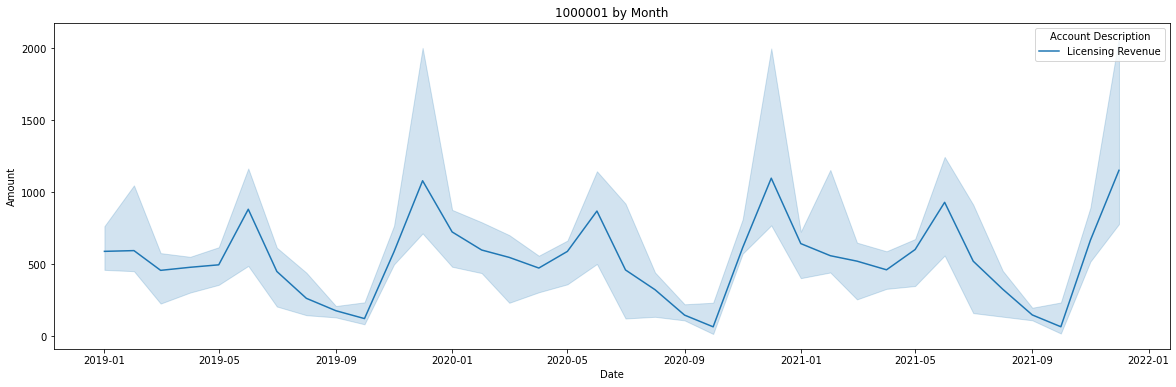

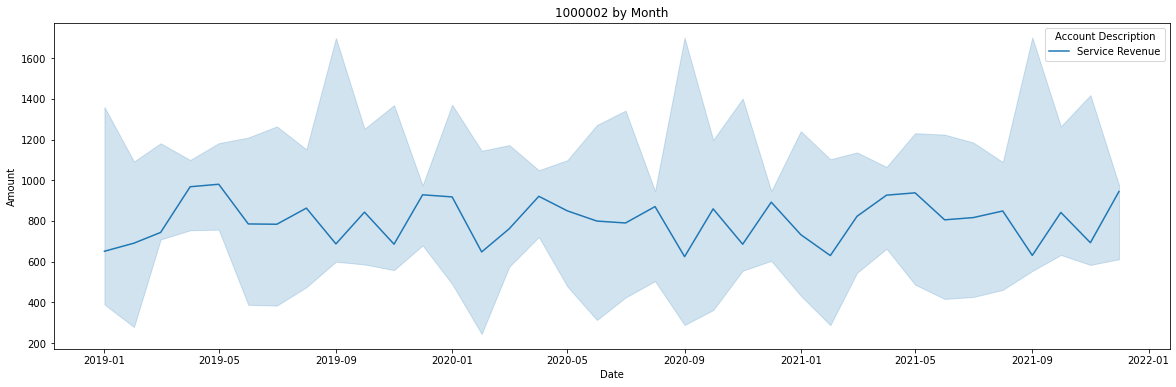

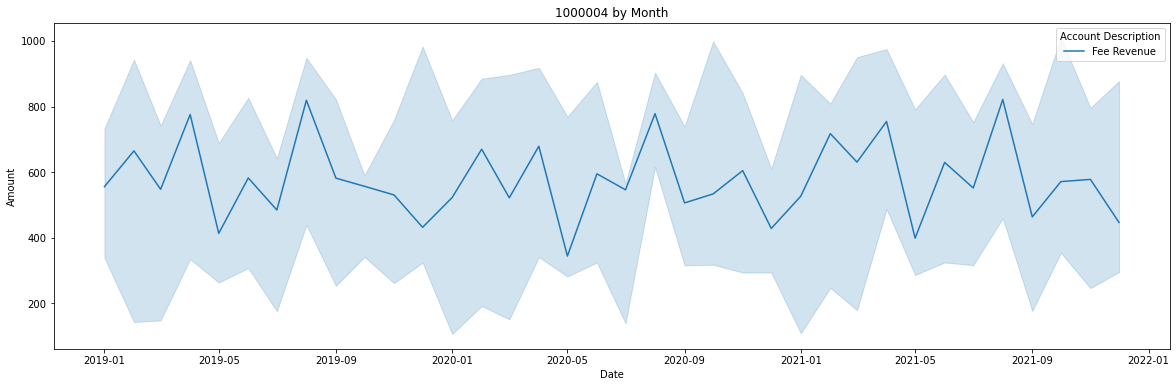

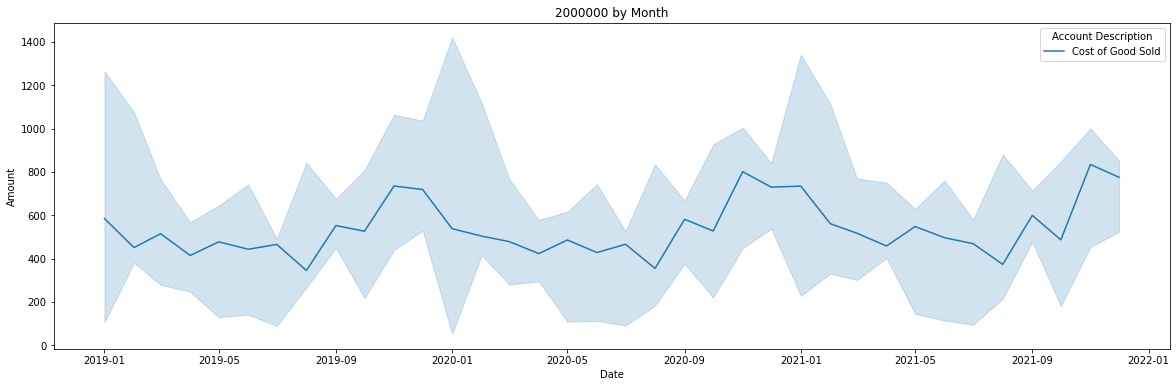

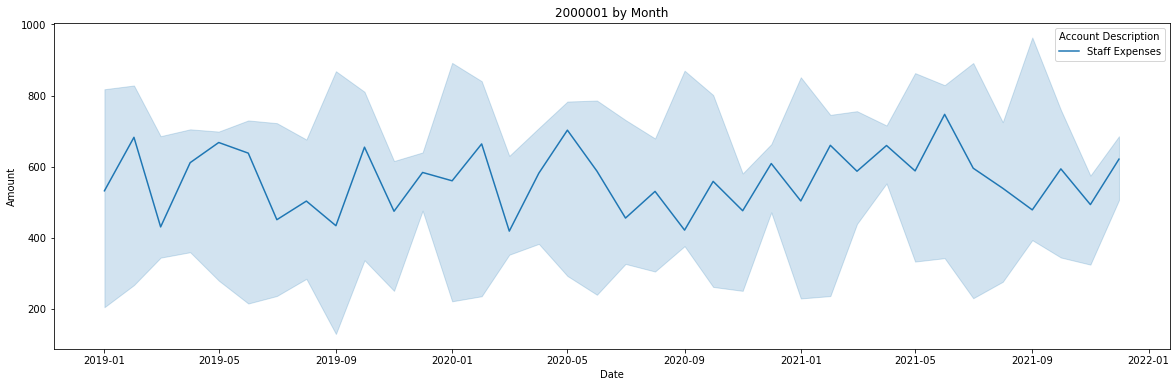

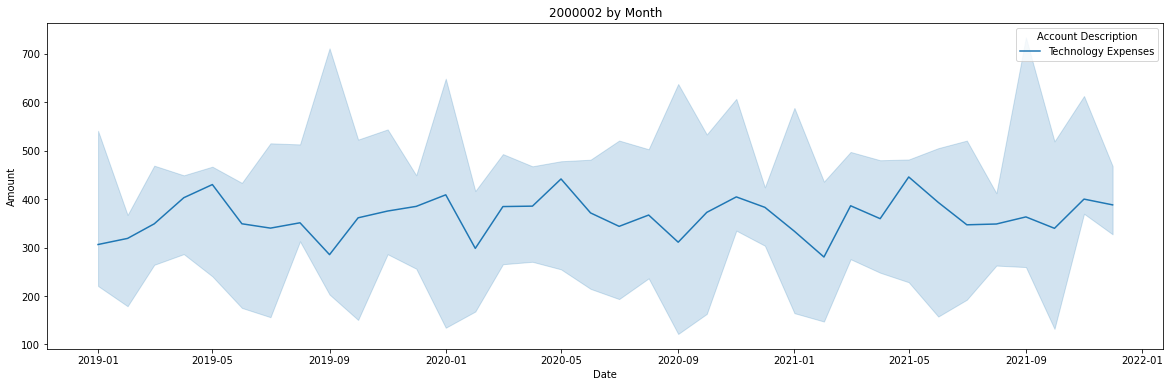

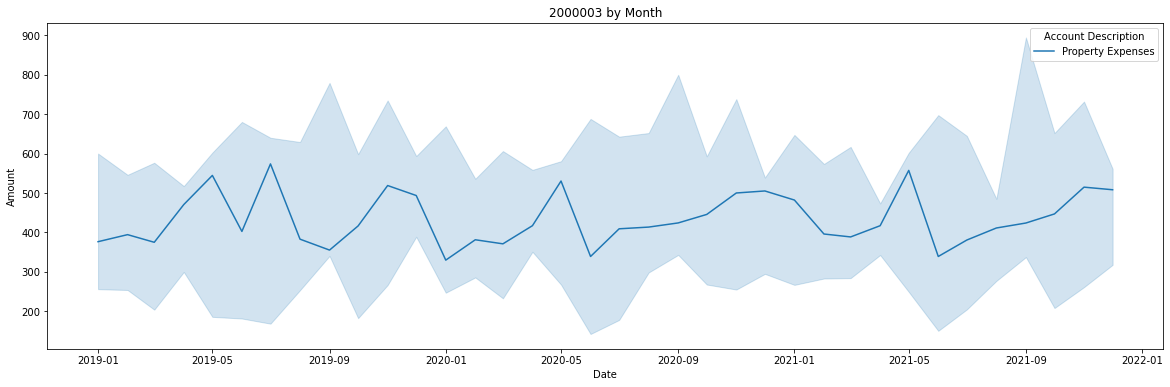

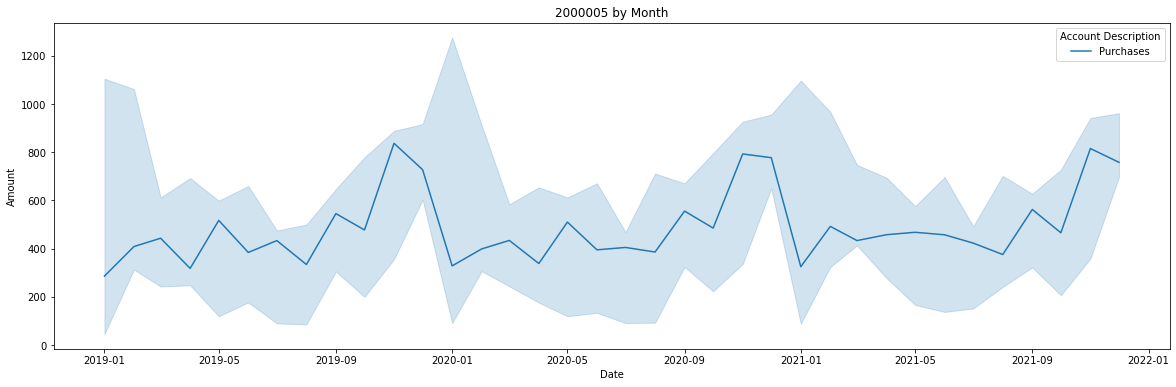

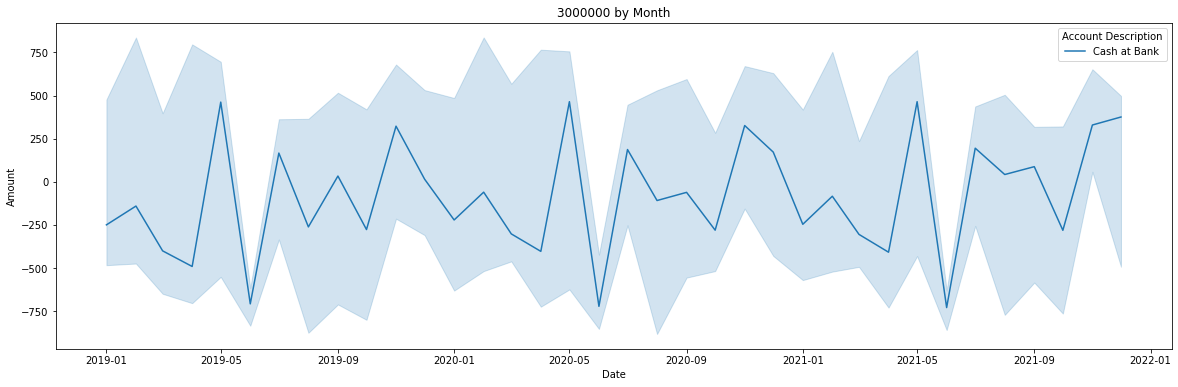

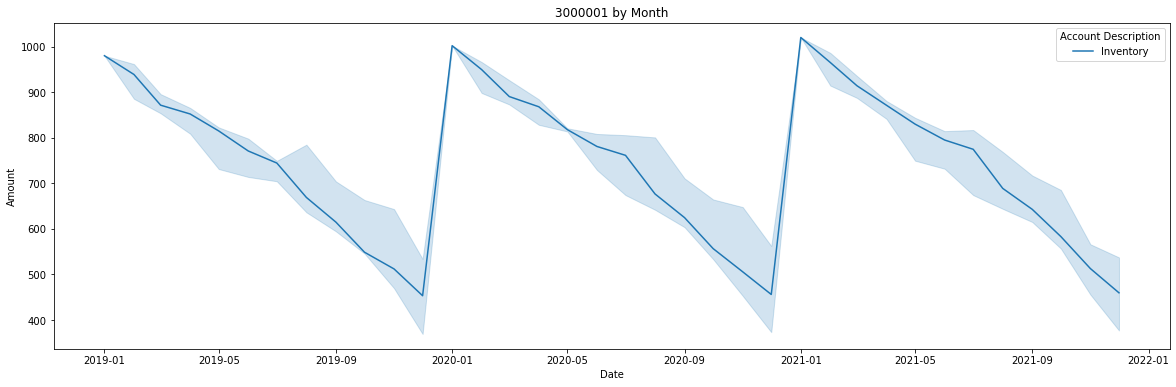

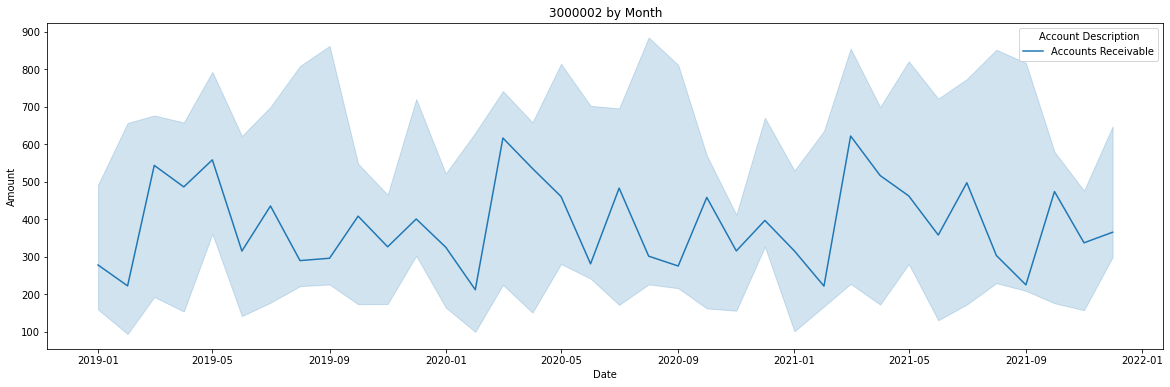

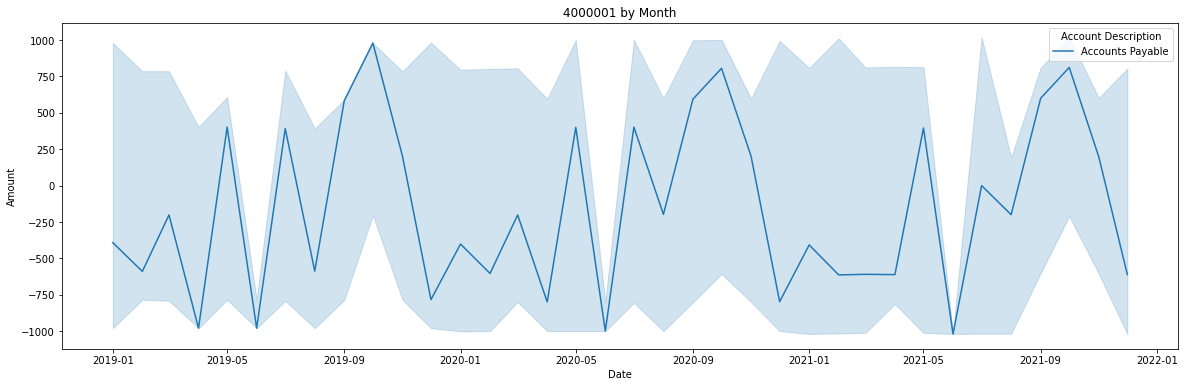

In [137]:
for account in df['Account'].unique():
  plt.figure(figsize=(20, 6))
  snb.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
  plt.show()

In [138]:
# Due the unique zigzag graph, it can be deduced that inventory follow a different type of season
# So let's remove inventory
df = df[df['Account']!=3000001]

In [139]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])

In [140]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [141]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [142]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [143]:
df['Year'] = df['Year'].astype(str)

In [144]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [145]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [146]:
len(df['Account'].unique())

12

In [147]:
len(df['Account Description'].unique())

12

In [148]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [149]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [150]:
len(df['AccountVal'].unique())

12

In [151]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [152]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [153]:
pd.get_dummies(df)

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [154]:
df.dtypes

Year             object
Month            object
Cost Centre      object
Account          object
Account Type     object
Amount          float64
dtype: object

In [155]:
df = pd.get_dummies(df)

In [156]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [157]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

In [158]:
x = df.drop('Amount', axis=1)
y = df['Amount']

In [159]:
x.columns

Index(['Year_2019', 'Year_2020', 'Year_2021', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Cost Centre_CC100', 'Cost Centre_CC101', 'Cost Centre_CC102',
       'Cost Centre_CC200', 'Cost Centre_CC201', 'Cost Centre_CC202',
       'Cost Centre_CC300', 'Cost Centre_CC301', 'Cost Centre_CC302',
       'Account_ACC1000000', 'Account_ACC1000001', 'Account_ACC1000002',
       'Account_ACC1000004', 'Account_ACC2000000', 'Account_ACC2000001',
       'Account_ACC2000002', 'Account_ACC2000003', 'Account_ACC2000005',
       'Account_ACC3000000', 'Account_ACC3000002', 'Account_ACC4000001',
       'Account Type_Asset', 'Account Type_Expense', 'Account Type_Liability',
       'Account Type_Revenue'],
      dtype='object')

In [196]:
X_test.columns.to_numpy().tolist()

['Year_2019',
 'Year_2020',
 'Year_2021',
 'Month_Apr',
 'Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jan',
 'Month_Jul',
 'Month_Jun',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'Cost Centre_CC100',
 'Cost Centre_CC101',
 'Cost Centre_CC102',
 'Cost Centre_CC200',
 'Cost Centre_CC201',
 'Cost Centre_CC202',
 'Cost Centre_CC300',
 'Cost Centre_CC301',
 'Cost Centre_CC302',
 'Account_ACC1000000',
 'Account_ACC1000001',
 'Account_ACC1000002',
 'Account_ACC1000004',
 'Account_ACC2000000',
 'Account_ACC2000001',
 'Account_ACC2000002',
 'Account_ACC2000003',
 'Account_ACC2000005',
 'Account_ACC3000000',
 'Account_ACC3000002',
 'Account_ACC4000001',
 'Account Type_Asset',
 'Account Type_Expense',
 'Account Type_Liability',
 'Account Type_Revenue']

In [195]:
X_test.iloc[0].to_numpy().tolist()

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [160]:
y

0       1344.051
1        480.968
2        650.820
3        339.360
4       1125.328
          ...   
4206     540.060
4207     698.121
4208    -282.056
4210    1152.680
4211   -1020.000
Name: Amount, Length: 3888, dtype: float64

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1234)

In [163]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 40) (389, 40) (3499,) (389,)


In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [165]:
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge': make_pipeline(Ridge(random_state=1234)),
    'lasso': make_pipeline(Lasso(random_state=1234)),
    'enet': make_pipeline(ElasticNet(random_state=1234))
}

In [166]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2,4,6],
        'randomforestregressor__min_samples_leaf': [1,2,3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [169]:
fit_models = {}
for algo, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
  try:
    print('Starting training for {}. '.format(algo))
    model.fit(X_train, y_train)
    fit_models[algo] = model
    print('{} has been successfully fit. '.format(algo))
  except NotFittedError as e:
    print(repr(e))

Starting training for rf. 
rf has been successfully fit. 
Starting training for gb. 
gb has been successfully fit. 
Starting training for ridge. 
ridge has been successfully fit. 
Starting training for lasso. 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24687588.097044647, tolerance: 74723.56959588069
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9907825.563839912, tolerance: 75232.09695127881
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13686179.278899968, tolerance: 72766.48093895584
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

lasso has been successfully fit. 
Starting training for enet. 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43837417.72375855, tolerance: 75232.09695127881
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43832165.41877946, tolerance: 72766.48093895584
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45835835.629666835, tolerance: 74723.56959588069
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

enet has been successfully fit. 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45315931.8686502, tolerance: 75216.51607702565
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44884500.74011111, tolerance: 75274.52357609713
  model = cd_fast.enet_coordinate_descent(


In [170]:
fit_models['lasso'].predict(X_test)

array([ 415.4239166 ,  510.25976036,  358.00238706,  340.73682891,
        773.07876737,  661.34933248,  273.52433359,  488.6804627 ,
        465.5431624 ,  855.5995471 ,  547.7468813 ,  458.23047212,
        642.94384085,  498.06105437,  452.5266518 ,  642.3742077 ,
        477.67402302,  572.86167029,  283.76573394,  518.14923   ,
        330.78120351,  715.19701156,  595.75756074,  823.81794893,
        485.08977187,  306.42154008,  367.03996254,  499.51826841,
        -53.25782789,  312.92856225,  510.22118754,  514.62072205,
       -189.2114328 ,   19.36911197,  829.85322608,  531.91392624,
        634.96882663, -261.84594684, -180.62229092,  550.37902871,
       -320.40856826,  415.55784771,  491.30408464,  772.33858269,
        504.2053709 , -112.97474233,  588.02130884, -121.9696359 ,
         71.5414832 , -339.22510595,  281.00579759,  509.54541289,
        502.10438134,  548.94424053,  157.60418833,  519.06726789,
        343.02509221,  -30.58680265,  579.72887266,  565.47871

In [171]:
from sklearn.metrics import r2_score, mean_absolute_error

In [172]:
for algo, model in fit_models.items():
  yhat = model.predict(X_test)
  print('{} scores - R2: {} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2: 0.9074773370556327 MAE:105.16866637532131
gb scores - R2: 0.48737206390749754 MAE:272.74122569621693
ridge scores - R2: 0.3237633061198437 MAE:311.55521236075606
lasso scores - R2: 0.3254160096858828 MAE:311.4647003227321
enet scores - R2: 0.3244856996785842 MAE:311.5987273373601


In [173]:
best_model = fit_models['rf']

In [174]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

In [175]:
!python --version

Python 3.9.7


In [176]:
!pip install -U ibm-watson-machine-learning

In [177]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [178]:
wml_credentials = {
    "apikey": "t6AB8iGiEjTeOBvCpJieDhZiB2w3Rk1xCLgH2fTwIGFx",
    "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [179]:
!python --version

Python 3.9.7


In [180]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
f0985c13-cf57-4af5-930c-544a46d62363  Dev   2022-04-01T18:21:05.381Z
------------------------------------  ----  ------------------------


In [181]:
SPACE_ID='f0985c13-cf57-4af5-930c-544a46d62363'

In [182]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [183]:
#save and deploy Model

In [184]:
MODEL_NAME = 'Sklearn Forecast'
DEPLOYMENT_NAME = 'Sklearn Deployment'
BEST_MODEL = best_model

In [185]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

model_details = wml_client.repository.store_model (
    model=BEST_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train,
    pipeline=pipelines['rf']
)

Note: Warnings!! :  Software specification default_py3.8 specified for the wml_model is deprecated and will be removed in the future. We recommend you use runtime-22.1-py3.9 instead. For details see Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [186]:
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [187]:
model_uid = wml_client.repository.get_model_id(model_details)

In [188]:
model_uid

'41bd7e25-f177-4f6b-9220-7bcc13d0a62c'

In [197]:
# Set Meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid,
    meta_props=deployment_props
)

# Output result
deployment



#######################################################################################

Synchronous deployment creation for uid: '41bd7e25-f177-4f6b-9220-7bcc13d0a62c' started

#######################################################################################


initializing
Note: Software specification default_py3.8 is deprecated. Use runtime-22.1-py3.9 software specification instead. For details, see https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=cpdaas.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ff30489b-713c-4dd6-8676-c06c59a2f5de'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '41bd7e25-f177-4f6b-9220-7bcc13d0a62c'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': 'f0985c13-cf57-4af5-930c-544a46d62363',
  'status': {'online_url': {'url': 'https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/ff30489b-713c-4dd6-8676-c06c59a2f5de/predictions'},
   'serving_urls': ['https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/ff30489b-713c-4dd6-8676-c06c59a2f5de/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2022-04-02T20:44:19.820Z',
  'id': 'ff30489b-713c-4dd6-8676-c06c59a2f5de',
  'modified_at': '2022-04-02T20:44:19.820Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-665000B5PA',
  'space_id': 'f0985c13-cf57-4af5-930c-544a46d62363'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'Software specification default_py3.8 is deprecated. Use runtime-22

In [198]:
# Score Against Deployed Model

deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {
    "input_data": [{
        "fields": X_test.columns.to_numpy().tolist(),
        "values": X_test.to_numpy().tolist()
    }]
}
result = wml_client.deployments.score(deployment_uid, payload)

result

{'predictions': [{'fields': ['prediction'],
   'values': [[304.41729999999984],
    [505.5188599999999],
    [282.13067999999987],
    [302.17708000000033],
    [1252.6000900000008],
    [201.12535000000003],
    [428.8858300000003],
    [825.1462599999994],
    [680.9655599999994],
    [1436.3944700000002],
    [768.32893],
    [336.3901600000001],
    [715.6452499999999],
    [448.3418299999996],
    [278.55310999999995],
    [493.32988999999975],
    [662.3208100000005],
    [763.5201499999996],
    [199.55643999999978],
    [375.7253599999999],
    [419.41257000000036],
    [719.8733700000003],
    [858.2233400000003],
    [487.83273000000054],
    [482.3301100000001],
    [126.26648000000003],
    [527.44492],
    [452.9472999999996],
    [873.88346],
    [962.3538299999996],
    [314.82714999999973],
    [894.0122899999998],
    [-620.4],
    [-31.639499999999977],
    [840.8794100000002],
    [707.7982500000007],
    [855.7657799999998],
    [-213.45159999999993],
    [690.88801

In [191]:
payload

{'input_data': [{'fields': ['Year_2019',
    'Year_2020',
    'Year_2021',
    'Month_Apr',
    'Month_Aug',
    'Month_Dec',
    'Month_Feb',
    'Month_Jan',
    'Month_Jul',
    'Month_Jun',
    'Month_Mar',
    'Month_May',
    'Month_Nov',
    'Month_Oct',
    'Month_Sep',
    'Cost Centre_CC100',
    'Cost Centre_CC101',
    'Cost Centre_CC102',
    'Cost Centre_CC200',
    'Cost Centre_CC201',
    'Cost Centre_CC202',
    'Cost Centre_CC300',
    'Cost Centre_CC301',
    'Cost Centre_CC302',
    'Account_ACC1000000',
    'Account_ACC1000001',
    'Account_ACC1000002',
    'Account_ACC1000004',
    'Account_ACC2000000',
    'Account_ACC2000001',
    'Account_ACC2000002',
    'Account_ACC2000003',
    'Account_ACC2000005',
    'Account_ACC3000000',
    'Account_ACC3000002',
    'Account_ACC4000001',
    'Account Type_Asset',
    'Account Type_Expense',
    'Account Type_Liability',
    'Account Type_Revenue'],
   'values': [[0,
     0,
     1,
     0,
     0,
     0,
     0,
     

In [193]:
pred_values = np.squeeze(result['predictions'][0]['values']); pred_values
preddf = X_test.join(y_test)
preddf['Scores'] = pred_values
preddf.head()

,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue,Amount,Scores
3516,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,253.487,304.41730
196,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,483.433,505.51886
791,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,155.633,282.13068
339,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,115.409,302.17708
964,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1813.914,1252.60009


In [194]:
preddf.to_csv('results.csv')

In [ ]:
iam_token = wml_client.wml_token
